In [3]:
# 📌 Step 1: Import Libraries
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


In [6]:
# 📁 Step 2: Load Dataset
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Reddit_Data.csv\\Reddit_Data.csv")
df.head()
# 📊 Step 3: Data Overview
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB
None
clean_comment    100
category           0
dtype: int64


In [9]:
# Step 4: Clean Text (basic cleaning)
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"http\S+", "", text)               # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)           # remove special characters
    text = text.lower()                               # lowercase
    return text

# See all available columns
print(df.columns)



Index(['clean_comment', 'category'], dtype='object')


In [11]:
import pandas as pd

df = pd.read_csv("C:\\Users\\hp\\Downloads\\Reddit_Data.csv\\Reddit_Data.csv")
print(df.columns)
print(df.head(3))



Index(['clean_comment', 'category'], dtype='object')
                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\hp\AppData\Local\Temp\ipykernel_18892\942559002.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', palette='pastel', order=['Positive', 'Neutral', 'Negative'])


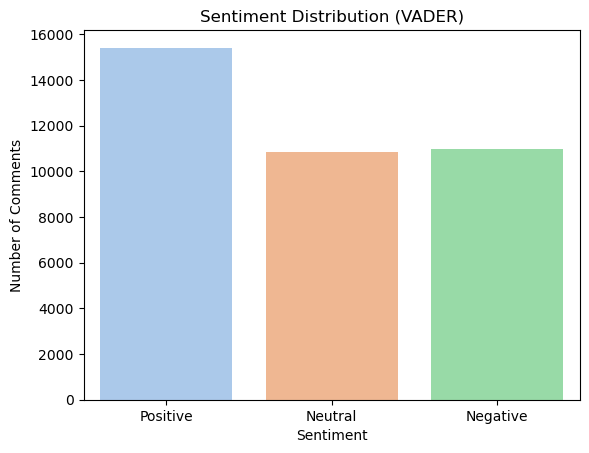

In [16]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Load and prepare
nltk.download('vader_lexicon')
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Reddit_Data.csv\\Reddit_Data.csv")
sia = SentimentIntensityAnalyzer()

# Clean text
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower()

df['cleaned_text'] = df['clean_comment'].apply(clean_text)

# Sentiment analysis using VADER
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['sentiment_score'].apply(get_sentiment)

# Plot sentiment distribution
sns.countplot(data=df, x='vader_sentiment', palette='pastel', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


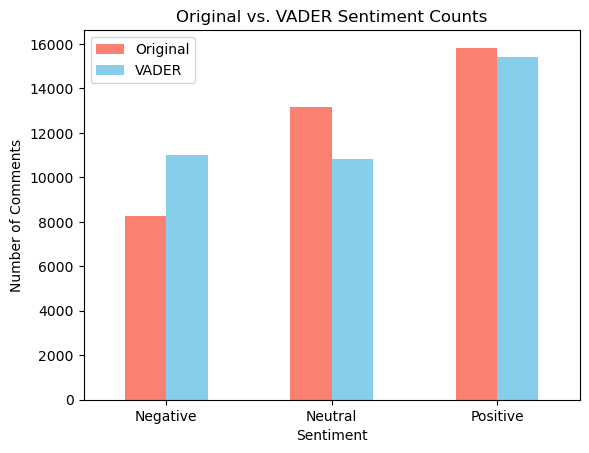

In [18]:
# Map numeric sentiment labels to string labels
label_map = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
df['original_sentiment'] = df['category'].map(label_map)



sentiment_counts = pd.DataFrame({
    'Original': df['original_sentiment'].value_counts(),
    'VADER': df['vader_sentiment'].value_counts()
})

sentiment_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Original vs. VADER Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()


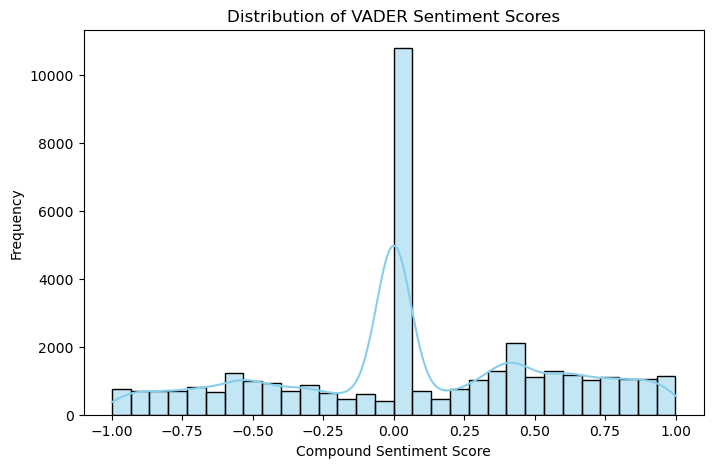

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of VADER Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()


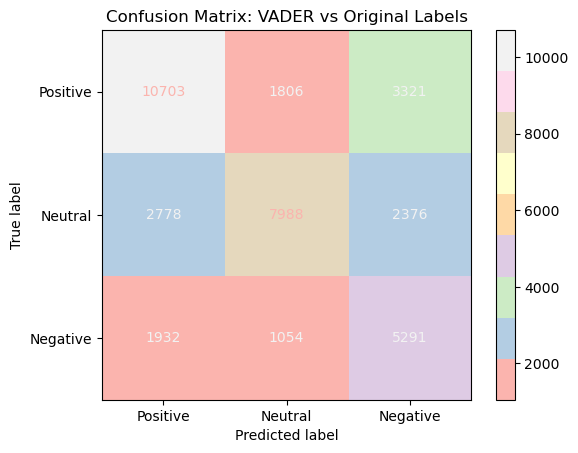

In [20]:
# Map category values to labels
label_map = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
df['original_sentiment'] = df['category'].map(label_map)

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['original_sentiment'], df['vader_sentiment'], labels=['Positive', 'Neutral', 'Negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='Pastel1')
plt.title("Confusion Matrix: VADER vs Original Labels")
plt.show()


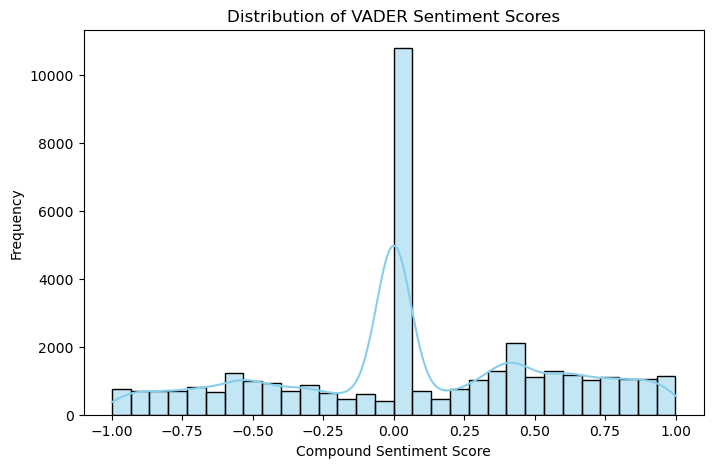

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of VADER Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()
